In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir("Scripts")
from PoissonApproximation import *
os.chdir("../")

# Law of large numbers

## Simple SEIR

In [2]:
# initial distribution
pi_0_true = np.transpose(np.array([[0.99, 0.0, 0.01, 0.0]]))

# transition kernel 
beta_true  = 0.5  # transmiss rate 
rho_true   = 0.05 # latent period rate
gamma_true = 0.1  # recovery rate

K_eta_true = K_eta_SEIR( beta_true, rho_true, gamma_true)

# no death
delta_true = np.ones((4, 1))

# emission distribution
q_true = np.transpose(np.array([[0.0, 0.0, 0.3, 0.2]]))

# no misreporting
G_true = np.eye(4) 

T = 200

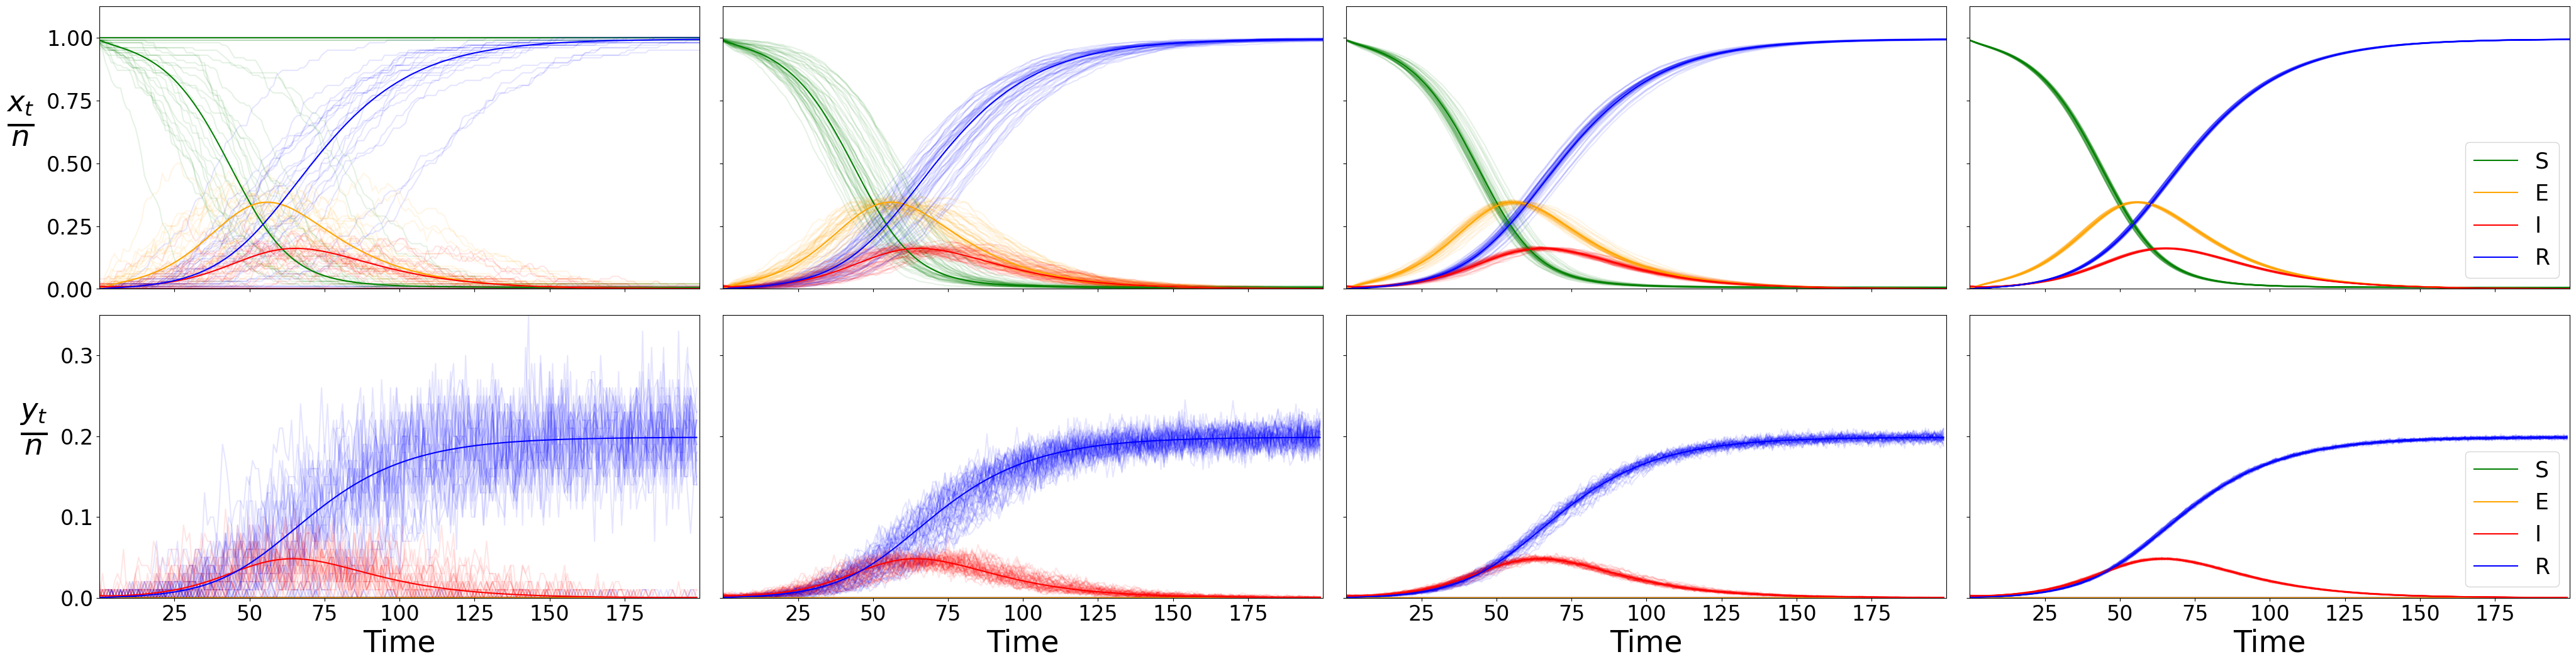

In [3]:
n_list = [100, 1000, 10000, 100000]

fig, (ax) = plt.subplots(2, len(n_list), figsize=(40, 10), dpi=100, sharex=True, sharey="row")
fig.tight_layout(h_pad=2)

# cycle over the pop sizes
for i in range(len(n_list)):

    # no immigration an no clutter
    alpha_true    = np.zeros((4, 1))
    kappa_true    =  np.zeros((4, 1))

    # compute the limits
    MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[i])
    Nu, Nu_pred = MODEL.run_nu(T)

    ax[1, i].set_xlabel("Time", fontsize = 34)
    ax[0, i].set_xlim((0, 200))
    ax[1, i].set_xlim((0, 200))

    ax[0, i].set_ylim((0, 1.125))
    ax[1, i].set_ylim((0, 0.35))

    if i ==0:
        ax[0, i].set_ylabel(r"$\frac{x_t}{n}$", fontsize = 48, rotation='horizontal', labelpad = 30)
        ax[1, i].set_ylabel(r"$\frac{y_t}{n}$", fontsize = 48, rotation='horizontal', labelpad = 30)

    ax[0, i].tick_params(axis='both', labelsize=24)
    ax[1, i].tick_params(axis='both', labelsize=24)

    ax[0, i].set_xticks(np.linspace(25, 175, 7))

    ax[0, i].set_yticks(np.linspace(0, 1, 5))
    ax[1, i].set_yticks(np.linspace(0, 0.3, 4))

    # repeat the experiment
    for w in range(50):

        X, Y = MODEL.run(T)

        ax[0, i].plot(X[0,:]/n_list[i], color = "green" , alpha = 0.1)
        ax[0, i].plot(X[1,:]/n_list[i], color = "orange", alpha = 0.1)
        ax[0, i].plot(X[2,:]/n_list[i], color = "red"   , alpha = 0.1)
        ax[0, i].plot(X[3,:]/n_list[i], color = "blue"  , alpha = 0.1)

        ax[1, i].plot(Y[0,1:]/n_list[i], color = "green" , alpha = 0.1)
        ax[1, i].plot(Y[1,1:]/n_list[i], color = "orange", alpha = 0.1)
        ax[1, i].plot(Y[2,1:]/n_list[i], color = "red"   , alpha = 0.1)
        ax[1, i].plot(Y[3,1:]/n_list[i], color = "blue"  , alpha = 0.1)

    ax[0, i].plot(Nu[0,:], color = "green",  label = "S")
    ax[0, i].plot(Nu[1,:], color = "orange", label = "E")
    ax[0, i].plot(Nu[2,:], color = "red",    label = "I")
    ax[0, i].plot(Nu[3,:], color = "blue",   label = "R")

    ax[1, i].plot(Nu_pred[0,1:], color = "green",  label = "S")
    ax[1, i].plot(Nu_pred[1,1:], color = "orange", label = "E")
    ax[1, i].plot(Nu_pred[2,1:], color = "red",    label = "I")
    ax[1, i].plot(Nu_pred[3,1:], color = "blue",   label = "R")

    if i ==3:
        ax[0, i].legend(loc = "lower right", fontsize = 25)
        ax[1, i].legend(loc = "lower right", fontsize = 25)
    

## Extended SEIR

In [4]:
# initial distribution
pi_0_true = np.transpose(np.array([[0.99, 0.0, 0.01, 0.0]]))

# transition kernel 
beta_true  = 0.5  # transmiss rate 
rho_true   = 0.05 # latent period rate
gamma_true = 0.1  # recovery rate

K_eta_true = K_eta_SEIR( beta_true, rho_true, gamma_true)

# 0.98 survival probability
delta_true    = 0.98+np.zeros((4, 1))
delta_true[0, 0] = delta_true[0, 0]

# emission distribution
q_true = np.transpose(np.array([[0.1, 0.1, 0.3, 0.2]]))
   
# misreporting
G_true = np.eye(4) 
G_true[0,0] = 1 - 0.05 
G_true[0,2] = 0.05  
G_true[1,1] = 0.0
G_true[1,0] = 0.3 
G_true[1,2] = 0.7  
G_true[2,0] = 0.15 
G_true[2,2] = 1-0.15  

T = 200

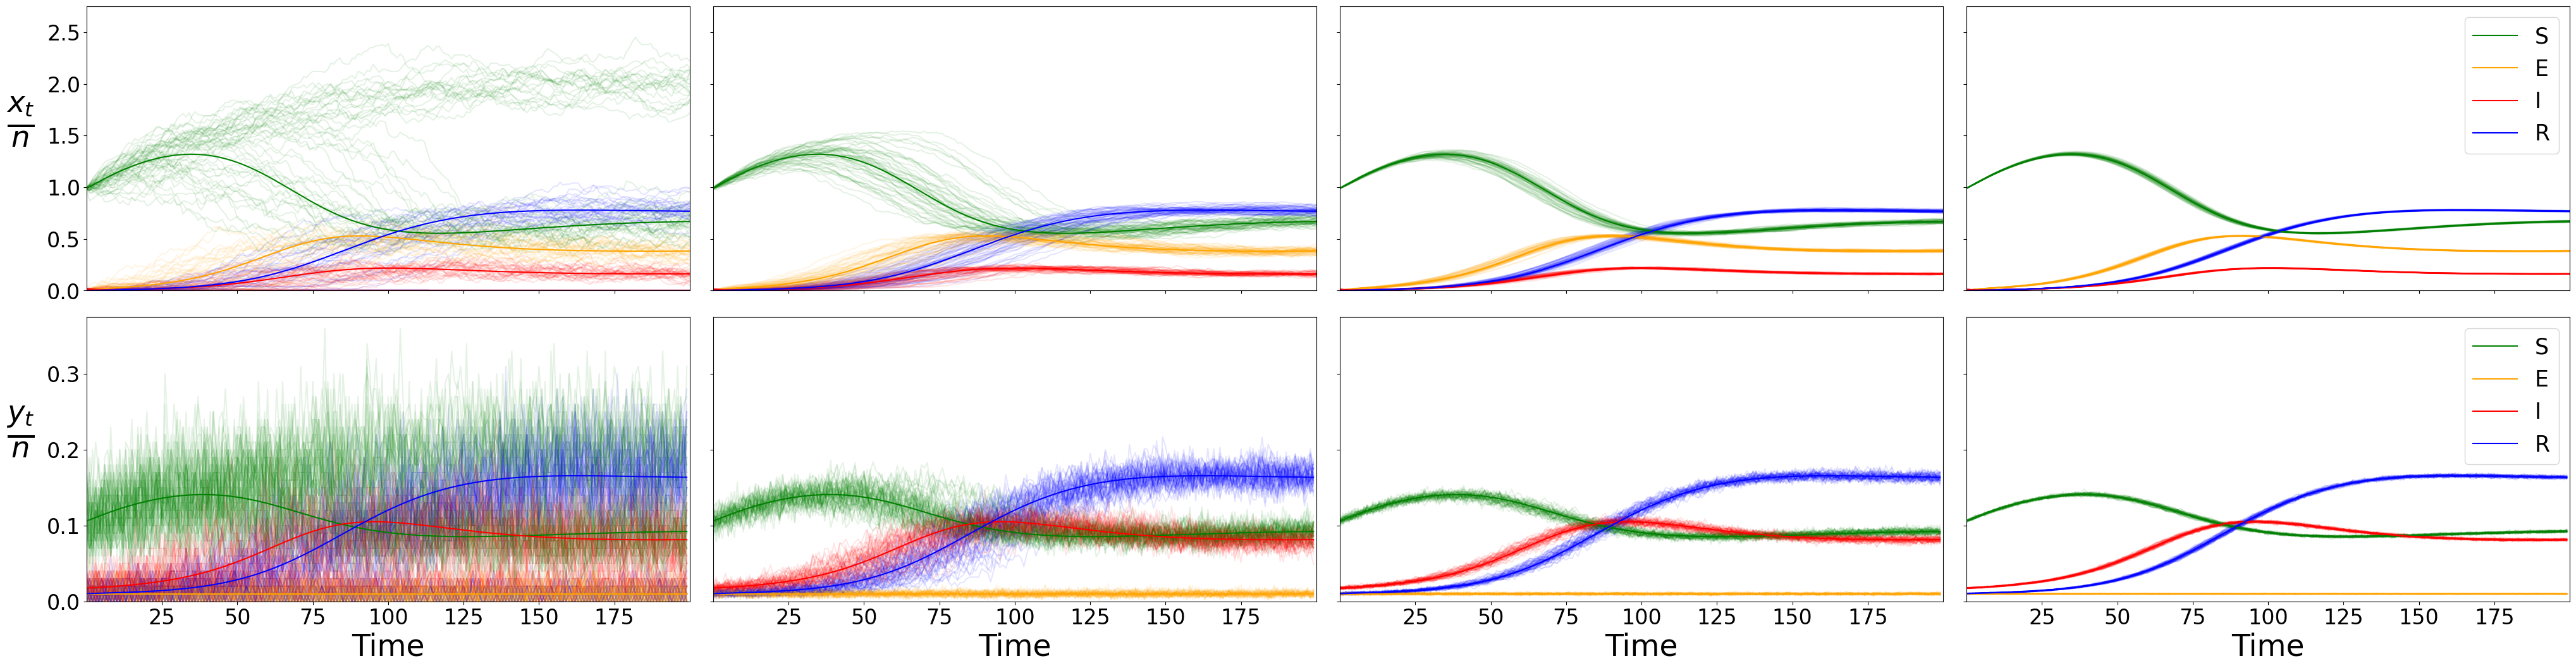

In [5]:
n_list = [100, 1000, 10000, 100000]

fig, (ax) = plt.subplots(2, len(n_list), figsize=(40, 10), dpi=100, sharex=True, sharey="row")
fig.tight_layout(h_pad=2)

for i in range(len(n_list)):
    # immigration that is 4% of the initial population and a clutter that is 1% of the initial population
    alpha_true    = np.zeros((4, 1))
    alpha_true[0, 0] = n_list[i]*0.04
    kappa_true =  n_list[i]*0.01 + np.zeros((4, 1))

    # compute the limits
    MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[i])
    Nu, Nu_pred = MODEL.run_nu(T)

    ax[1, i].set_xlabel("Time", fontsize = 34)
    ax[0, i].set_xlim((0, 200))
    ax[1, i].set_xlim((0, 200))

    ax[0, i].set_ylim((0, 2.75))
    ax[1, i].set_ylim((0, 0.375))

    if i ==0:
        ax[0, i].set_ylabel(r"$\frac{x_t}{n}$", fontsize = 48, rotation='horizontal', labelpad = 30)
        ax[1, i].set_ylabel(r"$\frac{y_t}{n}$", fontsize = 48, rotation='horizontal', labelpad = 30)

    ax[0, i].tick_params(axis='both', labelsize=24)
    ax[1, i].tick_params(axis='both', labelsize=24)

    ax[0, i].set_xticks(np.linspace(25, 175, 7))
    ax[0, i].set_yticks(np.linspace(0, 2.5, 6))
    ax[1, i].set_yticks(np.linspace(0, 0.3, 4))

    # repeat the experiment
    for w in range(50):

        X, Y = MODEL.run(T)

        ax[0, i].plot(X[0,:]/n_list[i], color = "green" , alpha = 0.1)
        ax[0, i].plot(X[1,:]/n_list[i], color = "orange", alpha = 0.1)
        ax[0, i].plot(X[2,:]/n_list[i], color = "red"   , alpha = 0.1)
        ax[0, i].plot(X[3,:]/n_list[i], color = "blue"  , alpha = 0.1)

        ax[1, i].plot(Y[0,1:]/n_list[i], color = "green" , alpha = 0.1)
        ax[1, i].plot(Y[1,1:]/n_list[i], color = "orange", alpha = 0.1)
        ax[1, i].plot(Y[2,1:]/n_list[i], color = "red"   , alpha = 0.1)
        ax[1, i].plot(Y[3,1:]/n_list[i], color = "blue"  , alpha = 0.1)


    ax[0, i].plot(Nu[0,:], color = "green",  label = "S")
    ax[0, i].plot(Nu[1,:], color = "orange", label = "E")
    ax[0, i].plot(Nu[2,:], color = "red",    label = "I")
    ax[0, i].plot(Nu[3,:], color = "blue",   label = "R")

    ax[1, i].plot(Nu_pred[0,1:], color = "green",  label = "S")
    ax[1, i].plot(Nu_pred[1,1:], color = "orange", label = "E")
    ax[1, i].plot(Nu_pred[2,1:], color = "red",    label = "I")
    ax[1, i].plot(Nu_pred[3,1:], color = "blue",   label = "R")

    if i ==3:
        ax[0, i].legend(loc = "upper right", fontsize = 25)
        ax[1, i].legend(loc = "upper right", fontsize = 25)

# Filtering intensity limits

## True parameters

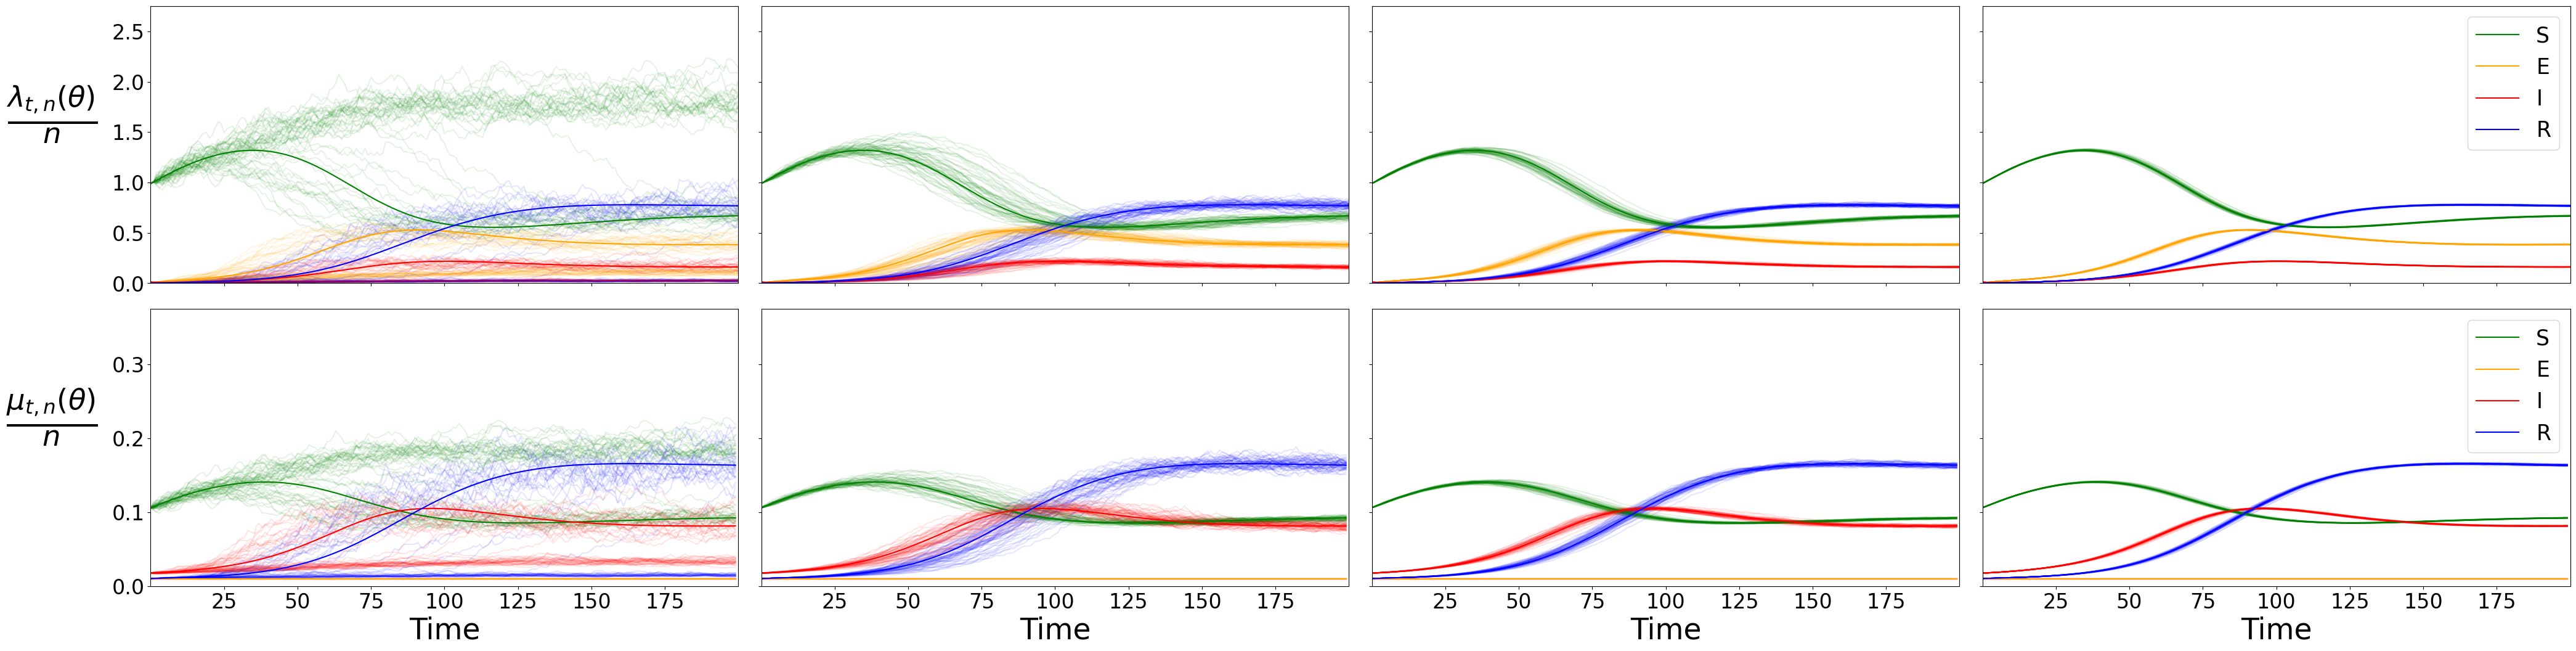

In [6]:
n_list = [100, 1000, 10000, 100000]

fig, (ax) = plt.subplots(2, len(n_list), figsize=(40, 10), dpi=100, sharex=True, sharey="row")
fig.tight_layout(h_pad=2)

for i in range(len(n_list)):
    # immigration that is 4% of the initial population and a clutter that is 1% of the initial population
    alpha_true    = np.zeros((4, 1))
    alpha_true[0, 0] = n_list[i]*0.04
    kappa_true =  n_list[i]*0.01 + np.zeros((4, 1))

    # compute the limits
    MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[i])
    POISSON_true                           = PoissonApproximation(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[i])
    _, Lambda_infty_true, _, barLambda_true, _, Mu_infty_true = POISSON_true.run_mu_lambda_infty( pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, T)

    ax[1, i].set_xlabel("Time", fontsize = 34)
    ax[0, i].set_xlim((0, 200))
    ax[1, i].set_xlim((0, 200))
    ax[0, i].set_ylim((0, 2.75))
    ax[1, i].set_ylim((0, 0.375))

    if i ==0:
        ax[0, i].set_ylabel(r"$\frac{\lambda_{t,n}(\theta)}{n}$", fontsize = 48, rotation='horizontal', labelpad = 70)
        ax[1, i].set_ylabel(r"$\frac{\mu_{t,n}(\theta)}{n}$", fontsize = 48, rotation='horizontal', labelpad = 70)

    ax[0, i].tick_params(axis='both', labelsize=24)
    ax[1, i].tick_params(axis='both', labelsize=24)

    ax[0, i].set_xticks(np.linspace(25, 175, 7))
    ax[0, i].set_yticks(np.linspace(0, 2.5, 6))
    ax[1, i].set_yticks(np.linspace(0, 0.3, 4))

    # repeat the experiment
    for w in range(50):

        X, Y = MODEL.run(T)
        Lambda, barLambda, Mu = POISSON_true.run_mu_lambda(Y)

        ax[0, i].plot(Lambda[0,:]/n_list[i], color = "green" , alpha = 0.1)
        ax[0, i].plot(Lambda[1,:]/n_list[i], color = "orange", alpha = 0.1)
        ax[0, i].plot(Lambda[2,:]/n_list[i], color = "red"   , alpha = 0.1)
        ax[0, i].plot(Lambda[3,:]/n_list[i], color = "blue"  , alpha = 0.1)

        ax[1, i].plot(Mu[0,1:]/n_list[i], color = "green" , alpha = 0.1)
        ax[1, i].plot(Mu[1,1:]/n_list[i], color = "orange", alpha = 0.1)
        ax[1, i].plot(Mu[2,1:]/n_list[i], color = "red"   , alpha = 0.1)
        ax[1, i].plot(Mu[3,1:]/n_list[i], color = "blue"  , alpha = 0.1)

    ax[0, i].plot(Lambda_infty_true[0,:], color = "green", label = "S")
    ax[0, i].plot(Lambda_infty_true[1,:], color = "orange", label = "E")
    ax[0, i].plot(Lambda_infty_true[2,:], color = "red", label = "I")
    ax[0, i].plot(Lambda_infty_true[3,:], color = "blue", label = "R")

    ax[1, i].plot(Mu_infty_true[0,1:], color = "green", label = "S")
    ax[1, i].plot(Mu_infty_true[1,1:], color = "orange", label = "E")
    ax[1, i].plot(Mu_infty_true[2,1:], color = "red", label = "I")
    ax[1, i].plot(Mu_infty_true[3,1:], color = "blue", label = "R")

    if i ==3:
        ax[0, i].legend(loc = "upper right", fontsize = 25)
        ax[1, i].legend(loc = "upper right", fontsize = 25)   

## Wrong parameters

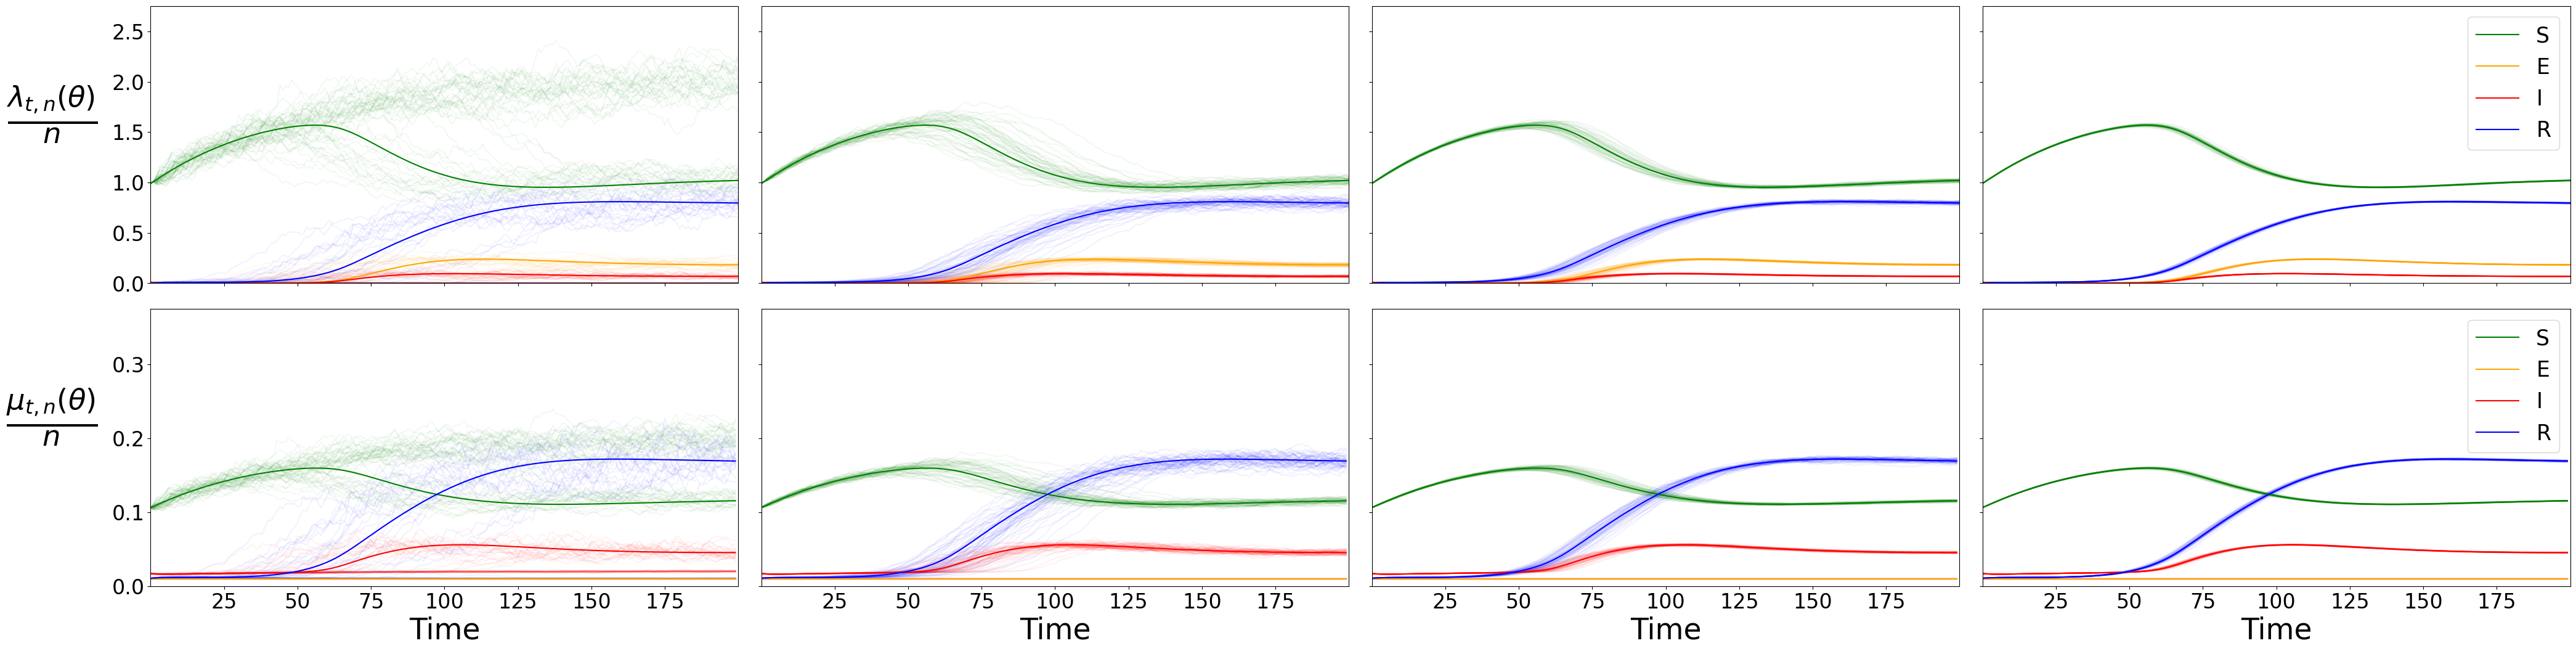

In [7]:
n_list = [100, 1000, 10000, 100000]

fig, (ax) = plt.subplots(2, len(n_list), figsize=(40, 10), dpi=100, sharex=True, sharey="row")
fig.tight_layout(h_pad=2)

for i in range(len(n_list)):
    # immigration that is 4% of the initial population and a clutter that is 1% of the initial population
    alpha_true    = np.zeros((4, 1))
    alpha_true[0, 0] = n_list[i]*0.04
    kappa_true =  n_list[i]*0.01 + np.zeros((4, 1))
    
    MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[i])

    # define the wrong parameters
    beta_fake  = 0.1
    gamma_fake = 0.3
    K_eta_fake = K_eta_SEIR( beta_fake, rho_true, gamma_fake)
    POISSON_fake                 = PoissonApproximation(pi_0_true, delta_true, K_eta_fake, alpha_true, q_true, G_true, kappa_true, n_list[i])

    # compute the limits
    Lambda_infty, _, barLambda, _, Mu_infty, _ = POISSON_fake.run_mu_lambda_infty( pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, T)


    ax[1, i].set_xlabel("Time", fontsize = 34)
    ax[0, i].set_xlim((0, 200))
    ax[1, i].set_xlim((0, 200))

    ax[0, i].set_ylim((0, 2.75))
    ax[1, i].set_ylim((0, 0.375))

    if i ==0:
        ax[0, i].set_ylabel(r"$\frac{\lambda_{t,n}(\theta)}{n}$", fontsize = 48, rotation='horizontal', labelpad = 70)
        ax[1, i].set_ylabel(r"$\frac{\mu_{t,n}(\theta)}{n}$", fontsize = 48, rotation='horizontal', labelpad = 70)

    ax[0, i].tick_params(axis='both', labelsize=24)
    ax[1, i].tick_params(axis='both', labelsize=24)

    ax[0, i].set_xticks(np.linspace(25, 175, 7))
    ax[0, i].set_yticks(np.linspace(0, 2.5, 6))
    ax[1, i].set_yticks(np.linspace(0, 0.3, 4))

    # repeat the experiment
    for w in range(50):

        X, Y = MODEL.run(T)
        Lambda, barLambda, Mu = POISSON_fake.run_mu_lambda(Y)

        ax[0, i].plot(Lambda[0,:]/n_list[i], color = "green" , alpha = 0.05)
        ax[0, i].plot(Lambda[1,:]/n_list[i], color = "orange", alpha = 0.05)
        ax[0, i].plot(Lambda[2,:]/n_list[i], color = "red"   , alpha = 0.05)
        ax[0, i].plot(Lambda[3,:]/n_list[i], color = "blue"  , alpha = 0.05)

        ax[1, i].plot(Mu[0,1:]/n_list[i], color = "green" , alpha = 0.05)
        ax[1, i].plot(Mu[1,1:]/n_list[i], color = "orange", alpha = 0.05)
        ax[1, i].plot(Mu[2,1:]/n_list[i], color = "red"   , alpha = 0.05)
        ax[1, i].plot(Mu[3,1:]/n_list[i], color = "blue"  , alpha = 0.05)

    ax[0, i].plot(Lambda_infty[0,:], color = "green", label = "S")
    ax[0, i].plot(Lambda_infty[1,:], color = "orange", label = "E")
    ax[0, i].plot(Lambda_infty[2,:], color = "red", label = "I")
    ax[0, i].plot(Lambda_infty[3,:], color = "blue", label = "R")

    ax[1, i].plot(Mu_infty[0,1:], color = "green", label = "S")
    ax[1, i].plot(Mu_infty[1,1:], color = "orange", label = "E")
    ax[1, i].plot(Mu_infty[2,1:], color = "red", label = "I")
    ax[1, i].plot(Mu_infty[3,1:], color = "blue", label = "R")
    if i ==3:
        ax[0, i].legend(loc = "upper right", fontsize = 25)
        ax[1, i].legend(loc = "upper right", fontsize = 25)    

# Consistency and identifiability

In [8]:
# This is how to generate the data, the experiment took around 2h 
# T = 100

# import matplotlib.pyplot as plt

# n_list = [100, 1000, 10000, 100000]

# LogW_list_nlist = []

# for n_index in range(len(n_list)):

#     LogW_list  = []

#     for w in range(50):
#         alpha_true    = np.zeros((4, 1))
#         alpha_true[0, 0] = n_list[n_index]*0.04
#         kappa_true =  n_list[n_index]*0.01 + np.zeros((4, 1))

#         MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[n_index])
#         X, Y = MODEL.run(T)
        
#         beta  = np.linspace(0.1, 0.7, 10)
#         gamma = np.linspace(0.05, 0.5, 10)
#         Beta, Gamma = np.meshgrid(beta, gamma)

#         LogW = np.zeros(Beta.shape)

#         for i in range(Beta.shape[0]):
#             for j in range(Beta.shape[1]):
#                 beta_fake  = Beta[i, j]
#                 gamma_fake = Gamma[i, j]
#                 K_eta_fake = K_eta_SEIR( beta_fake, rho_true, gamma_fake)
#                 POISSON_fake = PoissonApproximation(pi_0_true, delta_true, K_eta_fake, alpha_true, q_true, G_true, kappa_true, n_list[n_index])
#                 Lambda, Mu   = POISSON_fake.run_mu_lambda(Y)
#                 Lambda, logW = POISSON_fake.run(Y)
#                 LogW[i, j] = np.sum(logW)/n_list[n_index]
        
#         LogW_list.append(LogW)

#     LogW_list_nlist.append(LogW_list)

#     np.save("data/beta_gamma_grid.npy", np.array(LogW_list_nlist))

In [9]:
# Load the data from the experiment or run the experiment
LogW_list_nlist = np.load("Data/beta_gamma_grid.npy")

beta  = np.linspace(0.1, 0.7, 10)
gamma = np.linspace(0.05, 0.5, 10)
Beta, Gamma = np.meshgrid(beta, gamma)

## Extended SEIR

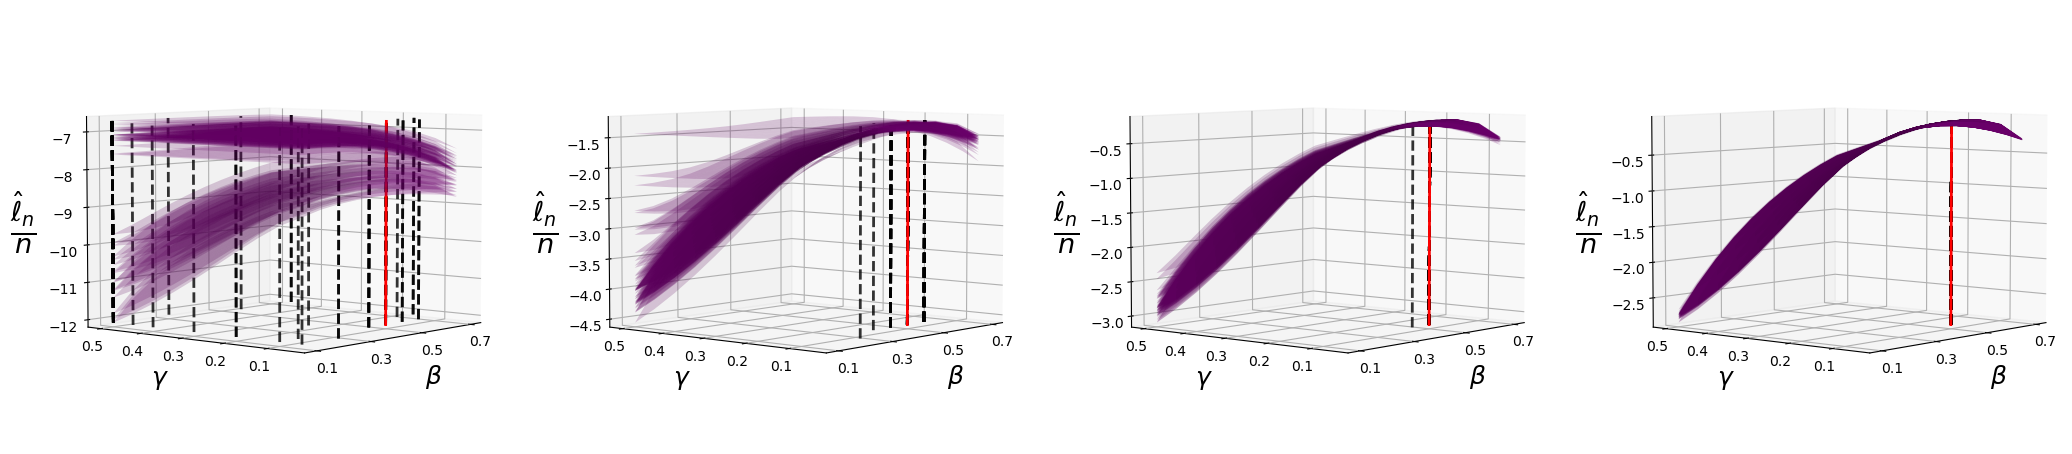

In [10]:
fig = plt.figure(figsize=(20, 50), dpi = 100)

for n_index in range(len(n_list)):
    ax = fig.add_subplot(1, len(n_list), n_index+1, projection='3d')

    for w in range(50):
        
        LogW = LogW_list_nlist[n_index, w, :, :]
        # plot the surface
        surf = ax.plot_surface(Beta, Gamma, (LogW), color = "purple", alpha = 0.2)#, cmap = "Purples")

    for w in range(50):

        LogW = LogW_list_nlist[n_index, w, :, :]

        max_x, max_y = np.where(LogW==np.max(LogW))
        max_x, max_y = max_x[0], max_y[0] 

        x = [Beta[ max_x, max_y],  Beta[max_x, max_y]]
        y = [Gamma[max_x, max_y], Gamma[max_x, max_y]]
        z = [np.min(LogW_list_nlist[n_index, :, :, :]), np.max(LogW_list_nlist[n_index, :, :, :])]

        # plot the maximum PAL
        ax.plot(x, y, z,'k--', alpha = 0.8, linewidth = 2)

    x = [beta_true , beta_true  ]
    y = [gamma_true, gamma_true ]

    # plot the DGP
    ax.plot(x, y, z, linewidth = 2, color = "red")

    ax.view_init(5, 220)

    ax.set_xlabel(r'$\beta$', labelpad=5, fontsize = 18)
    ax.set_xticks(np.linspace(0.1, 0.7, 4))
    ax.xaxis.set_tick_params(labelsize=10, pad = -1)
    ax.xaxis.set_rotate_label(False)

    ax.set_ylabel(r'$\gamma$', labelpad=5, fontsize = 18)
    ax.set_yticks(np.linspace(0.1, 0.5, 5))
    ax.yaxis.set_tick_params(labelsize=10, pad = -1)
    ax.yaxis.set_rotate_label(False)

    ax.set_zlabel(r'$\frac{\hat{\ell}_n}{n}$', labelpad=5, fontsize = 28)
    ax.zaxis.set_tick_params(labelsize=10, pad = 2)
    ax.zaxis.set_rotate_label(False)

fig.subplots_adjust(left=-0.1, right = 0.9)

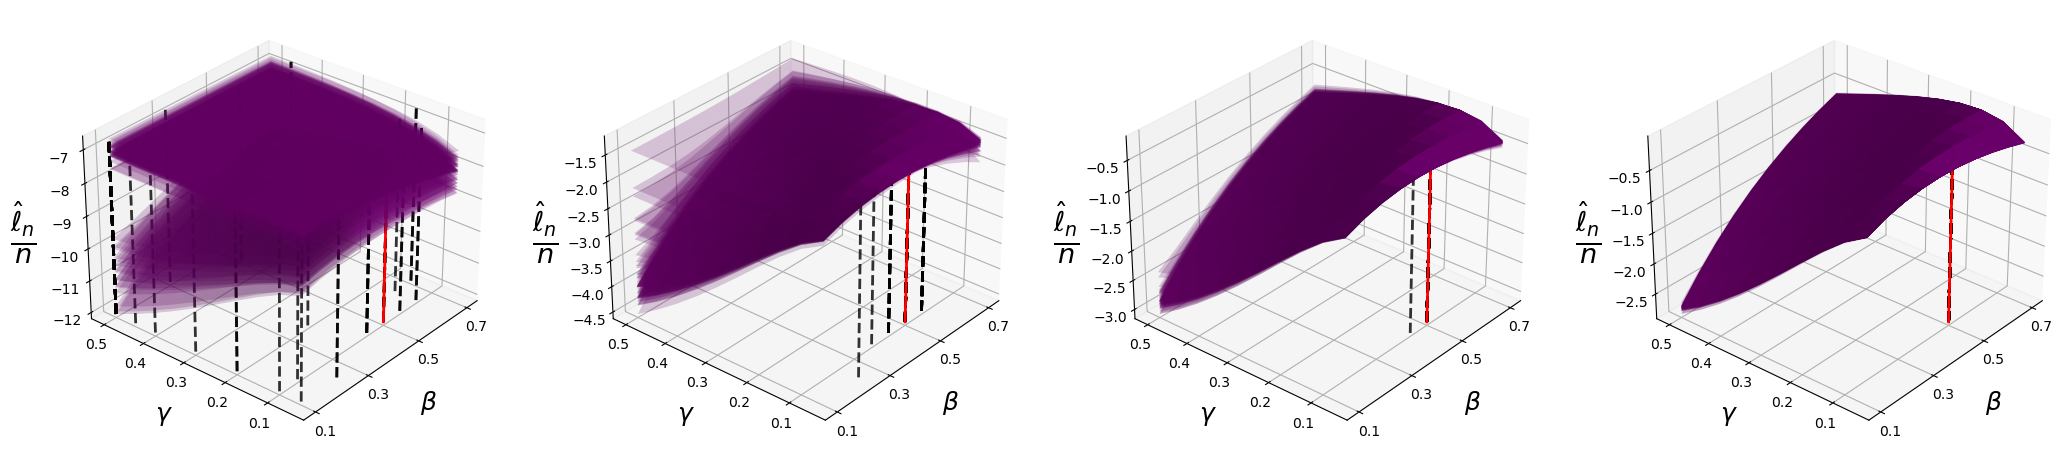

In [11]:
fig = plt.figure(figsize=(20, 50), dpi = 100)

for n_index in range(len(n_list)):
    ax = fig.add_subplot(1, len(n_list), n_index+1, projection='3d')

    for w in range(50):
        
        LogW = LogW_list_nlist[n_index, w, :, :]
        # plot the surface
        surf = ax.plot_surface(Beta, Gamma, (LogW), color = "purple", alpha = 0.2)#, cmap = "Purples")

    for w in range(50):

        LogW = LogW_list_nlist[n_index, w, :, :]

        max_x, max_y = np.where(LogW==np.max(LogW))
        max_x, max_y = max_x[0], max_y[0] 

        x = [Beta[ max_x, max_y],  Beta[max_x, max_y]]
        y = [Gamma[max_x, max_y], Gamma[max_x, max_y]]
        z = [np.min(LogW_list_nlist[n_index, :, :, :]), np.max(LogW_list_nlist[n_index, :, :, :])]

        # plot the maximum PAL
        ax.plot(x, y, z,'k--', alpha = 0.8, linewidth = 2)

    x = [beta_true , beta_true  ]
    y = [gamma_true, gamma_true ]

    # plot the DGP
    ax.plot(x, y, z, linewidth = 2, color = "red")

    ax.view_init(30, 220)

    ax.set_xlabel(r'$\beta$', labelpad=5, fontsize = 18)
    ax.set_xticks(np.linspace(0.1, 0.7, 4))
    ax.xaxis.set_tick_params(labelsize=10, pad = -1)
    ax.xaxis.set_rotate_label(False)

    ax.set_ylabel(r'$\gamma$', labelpad=5, fontsize = 18)
    ax.set_yticks(np.linspace(0.1, 0.5, 5))
    ax.yaxis.set_tick_params(labelsize=10, pad = -1)
    ax.yaxis.set_rotate_label(False)

    ax.set_zlabel(r'$\frac{\hat{\ell}_n}{n}$', labelpad=5, fontsize = 28)
    ax.zaxis.set_tick_params(labelsize=10, pad = 2)
    ax.zaxis.set_rotate_label(False)

fig.subplots_adjust(left=-0.1, right = 0.9)

## Extended SEEIR

In [12]:
# initial distribution
pi_0_true = np.transpose(np.array([[0.95, 0.0, 0.0, 0.05, 0.0]]))

# trnasition kernel 
beta_true  = 0.5 # transmiss rate 
rho_1_true = 0.05 # latent period rate
rho_2_true = 0.2 # latent period rate
gamma_true = 0.1 # recovery rate

K_eta_true = K_eta_SEEIR( beta_true, rho_1_true, rho_2_true, gamma_true)

# death 
delta_true    = 0.98+np.zeros((5, 1))
delta_true[0, 0] = delta_true[0, 0]

# emission distribution
q_true = np.transpose(np.array([[0.1, 0.1, 0.1, 0.3, 0.2]]))
   
# misreporting
G_true = np.eye(5) 
G_true[0,0] = 1 - 0.05 
G_true[0,2] = 0.05  
G_true[1,1] = 0.0
G_true[1,0] = 0.5 
G_true[1,3] = 0.5 
G_true[2,2] = 0.0  
G_true[2,0] = 0.5 
G_true[2,3] = 0.5  
G_true[3,0] = 0.15 
G_true[3,3] = 1-0.15  

# set of equivalent parameters
def theta_star_set(constant, rho_1):
    
    return 1/(constant - 1/rho_1)

In [13]:
# This is how to generate the data, the experiment took around 2h 
# # T = 100

# n_list = [100, 1000, 10000, 100000]

# LogW_list_nlist_identifiability = []

# for n_index in range(len(n_list)):

#     LogW_list  = []

#     for w in range(50):
#         alpha_true    = np.zeros((5, 1))
#         alpha_true[0, 0] = n_list[n_index]*0.04
#         kappa_true =  n_list[n_index]*0.01 + np.zeros((5, 1))

#         MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n_list[n_index])
#         X, Y = MODEL.run(T)
        
#         rho_1_grid = np.concatenate((np.linspace(0.045, 0.051, 7), np.linspace(0.053, 0.055, 3), np.linspace(0.06, 0.10, 3), np.linspace(0.15, 0.35, 7) ))
#         rho_2_grid = theta_star_set((1/rho_1_true + 1/rho_2_true), rho_1_grid)
#         Rho_1, Rho_2 = np.meshgrid(rho_1_grid, rho_2_grid)

#         LogW = np.zeros(Rho_2.shape)

#         for i in range(Rho_1.shape[0]):
#             for j in range(Rho_2.shape[1]):
#                 rho_1_fake  = Rho_1[i, j]
#                 rho_2_fake = Rho_2[i, j]
#                 K_eta_fake = K_eta_SEEIR( beta_true, rho_1_fake, rho_2_fake, gamma_true)
#                 POISSON_fake = PoissonApproximation(pi_0_true, delta_true, K_eta_fake, alpha_true, q_true, G_true, kappa_true, n_list[n_index])
#                 Lambda, Mu   = POISSON_fake.run_mu_lambda(Y)
#                 Lambda, logW = POISSON_fake.run(Y)
#                 LogW[i, j] = np.sum(logW)/n_list[n_index]
        
#         LogW_list.append(LogW)

#     LogW_list_nlist_identifiability.append(LogW_list)

# np.save("data/beta_gamma_grid_identifiability.npy", np.array(LogW_list_nlist_identifiability))

In [14]:
# Load the dat or run the experiment
LogW_list_nlist_identifiability = np.load("data/beta_gamma_grid_identifiability.npy")

# the grid is build in such a way that it generate combination of rho_1 and rho_2 in the desired set
rho_1_grid = np.concatenate((np.linspace(0.045, 0.051, 7), np.linspace(0.053, 0.055, 3), np.linspace(0.06, 0.10, 3), np.linspace(0.15, 0.35, 7) ))
rho_2_grid = theta_star_set((1/rho_1_true + 1/rho_2_true), rho_1_grid)
Rho_1, Rho_2 = np.meshgrid(rho_1_grid, rho_2_grid)

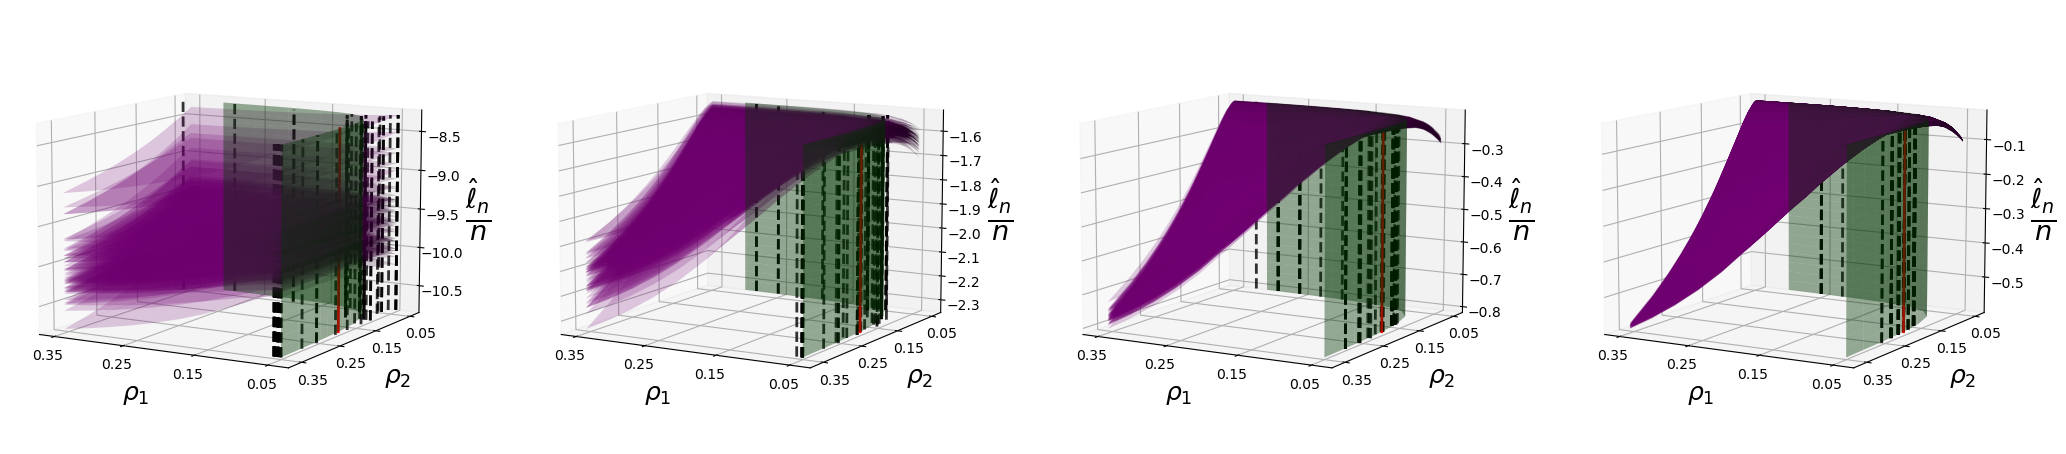

In [15]:
fig = plt.figure(figsize=(20, 50), dpi = 100)

for n_index in range(len(n_list)):
    ax = fig.add_subplot(1, len(n_list), n_index+1, projection='3d')

    z = [np.min(LogW_list_nlist_identifiability[n_index, :, :, :]), np.max(LogW_list_nlist_identifiability[n_index, :, :, :])]

    rho_1_new_grid = np.concatenate((np.linspace(0.045, 0.055, 13), np.linspace(0.065, 0.12, 4), np.linspace(0.15, 0.3, 4) ))
    rho_2_new_grid = theta_star_set((1/rho_1_true + 1/rho_2_true), rho_1_new_grid)

    X, Y = np.meshgrid(rho_1_new_grid, rho_2_new_grid)
    Z    = np.ones((len(rho_1_new_grid), len(rho_1_new_grid)))*np.linspace(z[0], z[1], len(rho_1_new_grid))
    # plot the green surface 
    surf = ax.plot_surface(np.transpose(X), (Y), (Z), color = "green", alpha = 0.4)

    for w in range(50):
        
        LogW = LogW_list_nlist_identifiability[n_index, w, :, :]
        # plot the PAL surface
        surf = ax.plot_surface(Rho_1, Rho_2, (LogW), color = "purple", alpha = 0.2)

    for w in range(50):
    
        LogW = LogW_list_nlist_identifiability[n_index, w, :, :]

        max_x, max_y = np.where(LogW==np.max(LogW))
        max_x, max_y = max_x[0], max_y[0] 

        x = [Rho_1[ max_x, max_y],  Rho_1[max_x, max_y]]
        y = [Rho_2[max_x, max_y], Rho_2[max_x, max_y]]
        z = [np.min(LogW_list_nlist_identifiability[n_index, :, :, :]), np.max(LogW_list_nlist_identifiability[n_index, :, :, :])]
        
        # plot the maximum PAL
        ax.plot(x, y, z,'k--', alpha = 0.8, linewidth = 2)

    x = [rho_1_true , rho_1_true  ]
    y = [rho_2_true, rho_2_true ]

    # plot the DGP
    ax.plot(x, y, z, linewidth = 2, color = "red")

    ax.view_init(10, 120)

    ax.set_xlabel(r'$\rho_1$', labelpad=5, fontsize = 18)
    ax.set_xticks(np.linspace(0.05, 0.35, 4))
    ax.xaxis.set_tick_params(labelsize=10, pad = -1)
    ax.xaxis.set_rotate_label(False)

    ax.set_ylabel(r'$\rho_2$', labelpad=5, fontsize = 18)
    ax.set_yticks(np.linspace(0.05, 0.35, 4))
    ax.yaxis.set_tick_params(labelsize=10, pad = -1)
    ax.yaxis.set_rotate_label(False)

    ax.set_zlabel(r'$\frac{\hat{\ell}_n}{n}$', labelpad=5, fontsize = 28)
    ax.zaxis.set_tick_params(labelsize=10, pad = 2)
    ax.zaxis.set_rotate_label(False)

fig.subplots_adjust(left=-0.1, right = 0.9)

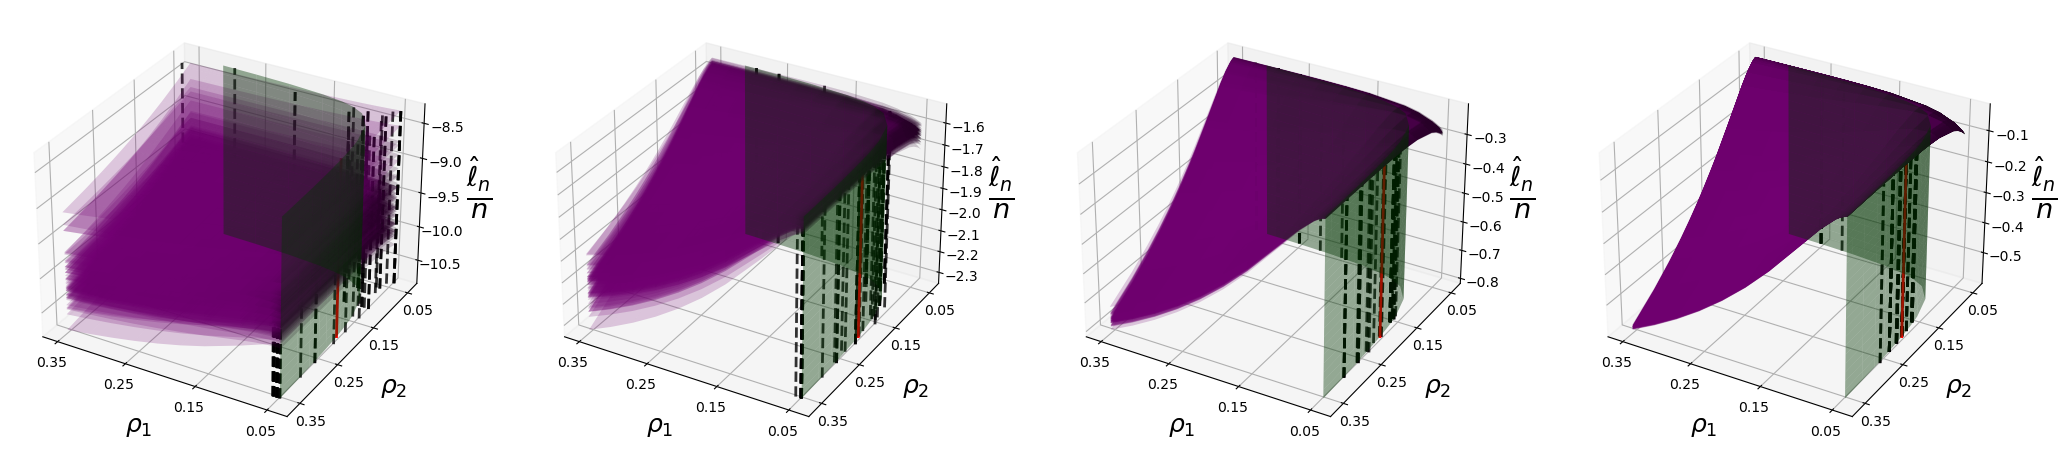

In [16]:
fig = plt.figure(figsize=(20, 50), dpi = 100)

for n_index in range(len(n_list)):
    ax = fig.add_subplot(1, len(n_list), n_index+1, projection='3d')

    z = [np.min(LogW_list_nlist_identifiability[n_index, :, :, :]), np.max(LogW_list_nlist_identifiability[n_index, :, :, :])]

    rho_1_new_grid = np.concatenate((np.linspace(0.045, 0.055, 13), np.linspace(0.065, 0.12, 4), np.linspace(0.15, 0.3, 4) ))
    rho_2_new_grid = theta_star_set((1/rho_1_true + 1/rho_2_true), rho_1_new_grid)

    X, Y = np.meshgrid(rho_1_new_grid, rho_2_new_grid)
    Z    = np.ones((len(rho_1_new_grid), len(rho_1_new_grid)))*np.linspace(z[0], z[1], len(rho_1_new_grid))
    # plot the green surface 
    surf = ax.plot_surface(np.transpose(X), (Y), (Z), color = "green", alpha = 0.4)

    for w in range(50):
        
        LogW = LogW_list_nlist_identifiability[n_index, w, :, :]
        # plot the PAL surface
        surf = ax.plot_surface(Rho_1, Rho_2, (LogW), color = "purple", alpha = 0.2)

    for w in range(50):
    
        LogW = LogW_list_nlist_identifiability[n_index, w, :, :]

        max_x, max_y = np.where(LogW==np.max(LogW))
        max_x, max_y = max_x[0], max_y[0] 

        x = [Rho_1[ max_x, max_y],  Rho_1[max_x, max_y]]
        y = [Rho_2[max_x, max_y], Rho_2[max_x, max_y]]
        z = [np.min(LogW_list_nlist_identifiability[n_index, :, :, :]), np.max(LogW_list_nlist_identifiability[n_index, :, :, :])]
        
        # plot the maximum PAL
        ax.plot(x, y, z,'k--', alpha = 0.8, linewidth = 2)

    x = [rho_1_true , rho_1_true  ]
    y = [rho_2_true, rho_2_true ]

    # plot the DGP
    ax.plot(x, y, z, linewidth = 2, color = "red")

    ax.view_init(30, 120)

    ax.set_xlabel(r'$\rho_1$', labelpad=5, fontsize = 18)
    ax.set_xticks(np.linspace(0.05, 0.35, 4))
    ax.xaxis.set_tick_params(labelsize=10, pad = -1)
    ax.xaxis.set_rotate_label(False)

    ax.set_ylabel(r'$\rho_2$', labelpad=5, fontsize = 18)
    ax.set_yticks(np.linspace(0.05, 0.35, 4))
    ax.yaxis.set_tick_params(labelsize=10, pad = -1)
    ax.yaxis.set_rotate_label(False)

    ax.set_zlabel(r'$\frac{\hat{\ell}_n}{n}$', labelpad=5, fontsize = 28)
    ax.zaxis.set_tick_params(labelsize=10, pad = 2)
    ax.zaxis.set_rotate_label(False)

fig.subplots_adjust(left=-0.1, right = 0.9)